In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np



In [3]:
cd ..

C:\Users\noahc\Value_Repo


In [4]:
# Load stock price data
df = pd.read_csv("data//raw//stock_data.csv")
df_price = df[['Date', 'Price']]


In [5]:
# Load stock price data from excel file
df_dict = pd.read_excel("data//raw//stock_dataXL.xlsx", sheet_name=None)
df_dict_price = df_dict.copy()
for key in df_dict_price:
    df_dict_price[key] = df_dict_price[key][['Date','Price']]


In [7]:
# Choose a stock to make predictions on
stock_df = df_dict_price['Russia - Sberbank Rossii PAO (S']
stock_df = stock_df.rename(columns = {"Date":"ds","Price":"y"})
stock_df = stock_df[:-1]
stock_df.ds = pd.DatetimeIndex(stock_df.ds).normalize()

In [8]:
# Split the data into training and test data
Rus_train = stock_df.loc[(stock_df['ds'] >= '2020-01-01') & (stock_df['ds'] <= '2020-12-30')]
Rus_test = stock_df.loc[(stock_df['ds'] >= '2021-01-01')]

In [9]:
# Train the model
model = Prophet(changepoint_prior_scale = 0.1, seasonality_prior_scale = 1)
model.fit(Rus_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\noahc\anaconda3\envs\tf\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [10]:
# Make predictions for the future
future = model.make_future_dataframe(periods=len(Rus_test))
forecast = model.predict(future)

C:\Users\noahc\anaconda3\envs\tf\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\noahc\anaconda3\envs\tf\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [11]:
# Extract the predicted stock prices
yhat = forecast['yhat'].iloc[-len(Rus_test):].values



In [12]:
# Calculate capital gains/losses for each buy, hold, and sell recommendation
recommendations = []
gains = []

In [20]:
# Buy recommendation if the predicted stock price is going to increase
for i in range(len(yhat) - 1):
    if yhat[i + 1] > yhat[i]:
        recommendations.append("Buy")
        gains.append(Rus_test['y'][i + 1] - Rus_test['y'][i])
    else:
        recommendations.append("Hold")
        gains.append(0)

In [21]:
# Sell recommendation if the predicted stock price is going to decrease
if yhat[-1] < yhat[-2]:
    recommendations.append("Sell")
    gains.append(Rus_test['y'][-2] - Rus_test['y'][-1])
else:
    recommendations.append("Hold")
    gains.append(0)

In [22]:
# Create a dataframe to store the results
results = pd.DataFrame({'Date': Rus_test['ds'].values,
                        'Predicted Price': yhat,
                        'Actual Price': Rus_test['y'].values,
                        'Recommendation': recommendations,
                        'Gains/Losses': gains})
print(results)

ValueError: All arrays must be of the same length

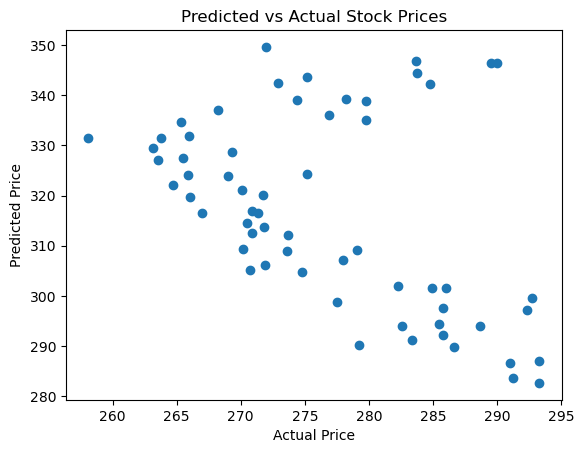

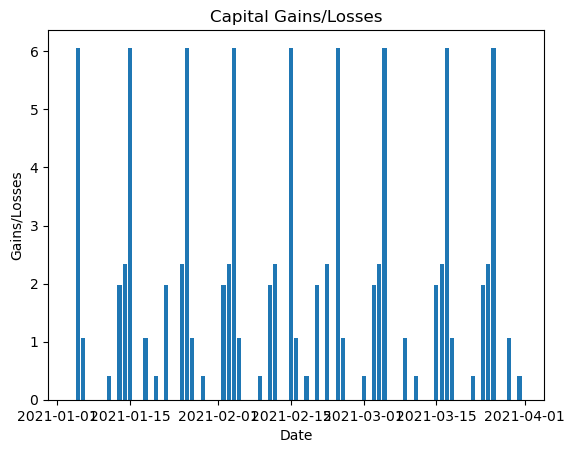

In [18]:
# Plot the predicted vs actual stock prices
import matplotlib.pyplot as plt

plt.scatter(results['Actual Price'], results['Predicted Price'])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Stock Prices')
plt.show()

# Plot the capital gains/losses
plt.bar(results['Date'], results['Gains/Losses'])
plt.xlabel('Date')
plt.ylabel('Gains/Losses')
plt.title('Capital Gains/Losses')
plt.show()